Objective: To develop a machine learning–based sales forecasting system for Walmart that accurately predicts future store-level sales for the next one week and the next one month.

In [36]:
#import the data 
import numpy as np 
import pandas as pd
df=pd.read_csv(r'Walmart Store Sales/Walmart DataSet.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Walmart Store Sales/Walmart DataSet.csv'

In [2]:
#to check the no of rows and columns in the dataset
df.shape

(6435, 8)

In [3]:
#checks count and data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#display statistics of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
#to check total null values in the dataset
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
#convert date column from object to date type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
#split the date column to year, month and week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

In [8]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010.0,5.0,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010.0,12.0,48
2,1,NaT,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,NaN,<NA>
3,1,NaT,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,NaN,<NA>
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010.0,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,NaT,713173.95,0,64.88,3.997,192.013558,8.684,NaN,NaN,<NA>
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012.0,5.0,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012.0,12.0,50
6433,45,NaT,718125.53,0,56.47,3.969,192.330854,8.667,NaN,NaN,<NA>


In [9]:
df.isnull().sum()

Store              0
Date            3870
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Year            3870
Month           3870
Week            3870
dtype: int64

In [10]:
#to ignore the future warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
#to replace missing values
df.fillna(method='ffill', inplace=True)

Exploratory Data Analysis

Created data visualisation using Matplotlib and Seaborn 

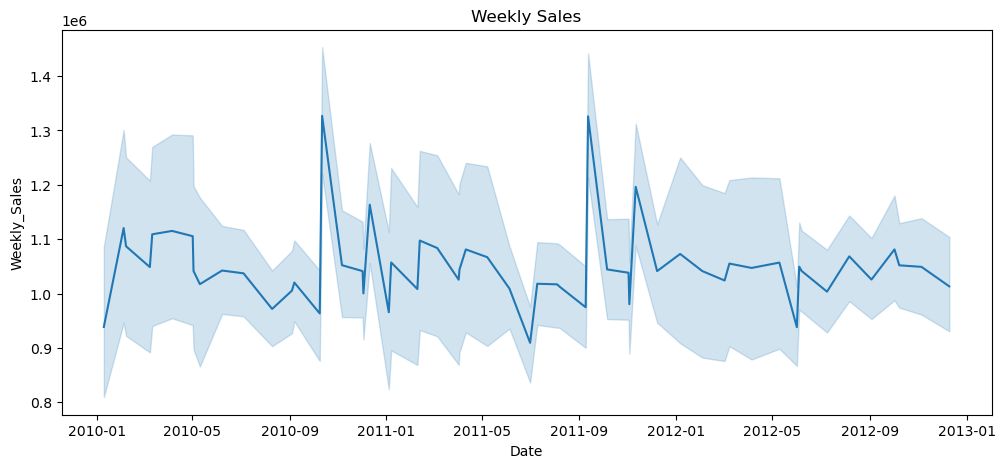

In [12]:
#weekly sales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.title("Weekly Sales")
plt.show()

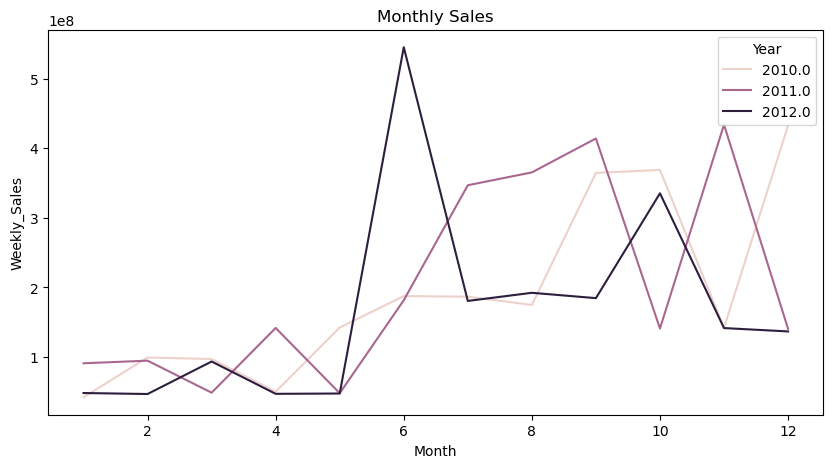

In [13]:
#monthly sales
monthly_sales = df.groupby(['Year','Month'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year')
plt.title("Monthly Sales")
plt.show()

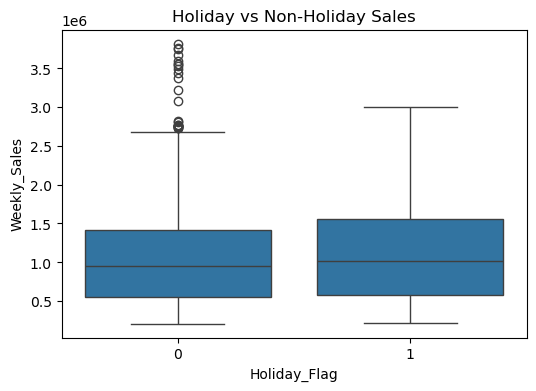

In [14]:
#impact of holidays on sales
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

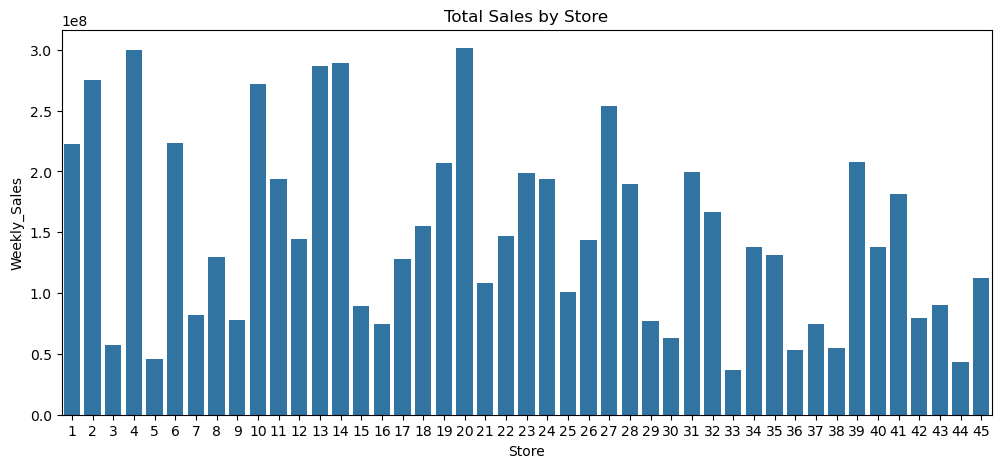

In [15]:
#store-wise sales comparison
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=store_sales, x='Store', y='Weekly_Sales')
plt.title("Total Sales by Store")
plt.show()

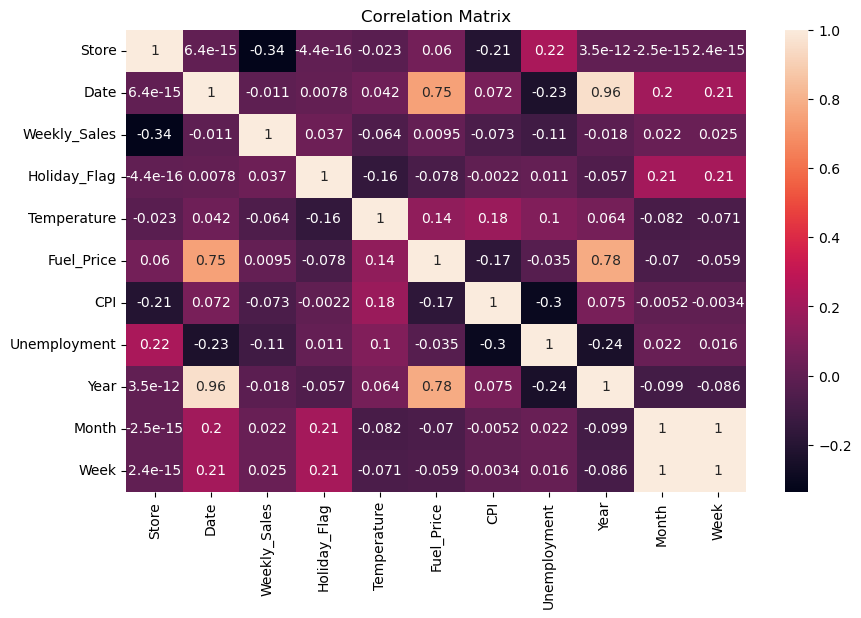

In [16]:
#correlation analysis between sales and external factors
df1=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df1, annot=True)
plt.title("Correlation Matrix")
plt.show()

Feature Engineering

In [17]:
#select input features and target column
input_features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment', 'Year', 'Month', 'Week']
target = 'Weekly_Sales'
x = df[input_features]
y = df[target]
x.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,0,42.31,2.572,211.096358,8.106,2010.0,5.0,17
1,1,1,38.51,2.548,211.242170,8.106,2010.0,12.0,48
2,1,0,39.93,2.514,211.289143,8.106,2010.0,12.0,48
3,1,0,46.63,2.561,211.319643,8.106,2010.0,12.0,48
4,1,0,46.50,2.625,211.350143,8.106,2010.0,5.0,18


In [18]:
#to check top elements in y
y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [19]:
#scale the input features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.43414873, ..., 0.        , 0.36363636,
        0.32653061],
       [0.        , 1.        , 0.39696673, ..., 0.        , 1.        ,
        0.95918367],
       [0.        , 0.        , 0.41086106, ..., 0.        , 1.        ,
        0.95918367],
       ...,
       [1.        , 0.        , 0.55313112, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.57270059, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.59598826, ..., 1.        , 1.        ,
        1.        ]])

In [20]:
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,0.0,0.0,0.434149,0.050100,0.840500,0.405118,0.0,0.363636,0.326531
1,0.0,1.0,0.396967,0.038076,0.841941,0.405118,0.0,1.000000,0.959184
2,0.0,0.0,0.410861,0.021042,0.842405,0.405118,0.0,1.000000,0.959184
3,0.0,0.0,0.476419,0.044589,0.842707,0.405118,0.0,1.000000,0.959184
4,0.0,0.0,0.475147,0.076653,0.843008,0.405118,0.0,0.363636,0.346939


In [21]:
#split into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=0)

Apply ML Algorithm 

In [22]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
#Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
#Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=100)
gb.fit(x_train,y_train)

GradientBoostingRegressor()

Model Evaluation

In [25]:
#model evaluation using evaluation metrics 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

In [26]:
lr_metrics=evaluate_model(lr, x_test, y_test)
lr_metrics

(426879.1688015855, 269098511708.01642, 0.16206844321688318)

In [27]:
rf_metrics = evaluate_model(rf, x_test, y_test)
rf_metrics

(70884.94694033559, 18287374835.28017, 0.9430559152187752)

In [28]:
gb_metrics = evaluate_model(gb, x_test, y_test)
gb_metrics

(137340.46916480234, 38572368157.452065, 0.8798915523767183)

In [29]:
#model evaluation is converted into dataframe to compare with other models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [lr_metrics[0], rf_metrics[0], gb_metrics[0]],
    'MSE': [lr_metrics[1], rf_metrics[1], gb_metrics[1]],
    'R2 Score': [lr_metrics[2], rf_metrics[2], gb_metrics[2]]
})
results

,Model,MAE,MSE,R2 Score
0,Linear Regression,426879.168802,2.690985e+11,0.162068
1,Random Forest,70884.946940,1.828737e+10,0.943056
2,Gradient Boosting,137340.469165,3.857237e+10,0.879892


Random Forest Regressor achieves the highest R2 score compared to Linear Regression and Gradient Boosting Regressor.

In [30]:
#to predict walmart store sales for next 1 week 
last_week_data = x.tail(1)
next_week_prediction = rf.predict(last_week_data)

next_week_prediction

array([679154.5604])

In [31]:
#to predict walmart store sales for next 1 month
last_week_data = x.tail(1).astype(float)
future_predictions = []

for i in range(4):
    next_pred = rf.predict(last_week_data)[0]
    future_predictions.append(next_pred)

    last_week_data = last_week_data.shift(-1, axis=1)
    last_week_data.iloc[0, -1] = next_pred

print("Next 1 month prediction:", future_predictions)

Next 1 month prediction: [679154.5604000003, 1686167.2317999993, 706509.1195, 706509.1195]


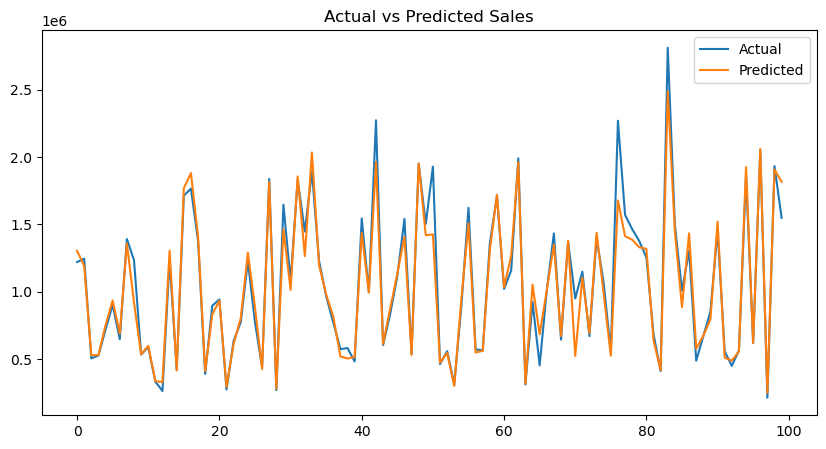

In [32]:
#shows the actual and predicted sales value graph 
y_pred_test = rf.predict(x_test)

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred_test[:100], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

Summary: The Walmart Sales Prediction project shows that machine learning models can effectively forecast short-term sales using historical data. These predictions can help retailers optimize inventory management, staffing, and strategic planning.